Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import base64

from selenium import webdriver
from seleniumwire.utils import decode
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as expected_conditions
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import undetected_chromedriver as uc

import json
import time
import re
from selenium.webdriver.common.by import By

Make a scraping function

In [2]:
def scrape_data(prompt, pagestop) :
    links = []
    page = 0
    url = 'https://www.tokopedia.com/'
    search = prompt
    proxy = 'proxy-server=106.122.8.54:3128'
    chromeuser = r'--user-data-dir=C:\Users\HP G7\AppData\Local\Google\Chrome\User Data\Default'
    
    options = uc.ChromeOptions()
    options.add_argument(proxy)
    options.add_argument(chromeuser)

    driver = uc.Chrome(options=options)
    driver.get(url)
    time.sleep(2)
    driver.find_element(By.XPATH, '//input[@placeholder="Cari di Tokopedia"]').send_keys(search + Keys.RETURN)

    while(page<pagestop) :
        print(f'Scrape links di page ke-{page+1}')
        time.sleep(1)
        driver.execute_script('window.scrollTo(0, 3000)')
        time.sleep(1)
        driver.execute_script('window.scrollTo(0, 1500)')
        time.sleep(1)
        driver.execute_script('window.scrollTo(0, 4500)')
        time.sleep(2)

        content = driver.find_elements(By.XPATH, "//a[@class='pcv3__info-content css-gwkf0u']")
        for c in content: 
            links.append(c.get_attribute('href'))
            
        driver.execute_script('window.scrollTo(0, 5000)')
        driver.find_element(By.XPATH, "(//button/*[name()='svg'])[last()]").click()
        page += 1
    
    print('------------------------------------')
    print(f'Berhasil mendapatkan {len(links)} link')
    print('------------------------------------')

    products = [dict() for x in range(len(links))]

    i = 0
    for link in links :
        print(f'Scrape produk ke-{i+1}')
        driver.get(link)
        time.sleep(1)
        driver.execute_script('window.scrollTo(0, 540)')
        time.sleep(1)
        
        try : 
            products[i]['name'] = driver.find_element(By.XPATH, '//h1').text
        except : 
            products[i]['name'] = '-'
        
        try : 
            products[i]['sold'] = driver.find_element(By.XPATH, "//p[@data-testid='lblPDPDetailProductSoldCounter']").text
        except: 
            products[i]['sold'] = '-'
        
        try : 
            products[i]['rating'] = driver.find_element(By.XPATH, "//span[@data-testid='lblPDPDetailProductRatingNumber']").text
        except: 
            products[i]['rating'] = '-'
        
        try : 
            products[i]['price'] = driver.find_element(By.XPATH, "//div[@data-testid='lblPDPDetailProductPrice']").text
        except: 
            products[i]['price'] = '-'
        
        try : 
            products[i]['city'] = driver.find_element(By.XPATH, "//h2[@class='css-1pd07ge-unf-heading e1qvo2ff2']/b").text
        except : 
            products[i]['city'] = '-'
        i+=1
        
    df = pd.DataFrame(products)
    df = df[df.name!='Access Denied']
    df.to_csv(f'{prompt}product.csv')
    return df

Make a main function

In [3]:
def main():
    prompt = input("Masukkan prompt : ")
    page = input("Masukkan page : ")
    df = scrape_data(prompt, int(page))
    
    # Data Engineer
    df = df[df.name!='-']
    df = df[df.name!='Access Denied']
    df['city'] = df['city'].apply(lambda x : x if x!='-' else np.nan)
    df['price'] = df['price'].apply(lambda x : int(x[2:].replace('.','')) if x!='-' else np.nan)
    df['rating'] = df['rating'].apply(lambda x : float(x) if x!='-' else np.nan)
    df['sold'] = df['sold'].apply(lambda x : ' '.join(str(x).split(' ')[1:]) if x!='-' else np.nan)
    df['sold'] = df['sold'].apply(lambda x: int(str(x).split()[0])*1000 if str(x)[-3:] == 'rb+' else x)
    df['sold'] = df['sold'].apply(lambda x: int(str(x)[:-1]) if str(x)[-1] == '+' else x)
    df['sold'] = df['sold'].apply(lambda x: int(x) if str(x).isnumeric() else x)
    df = df[df.sold!='barang berhasil terjual']
    return df

Run main function

In [4]:
df = main()

Scrape links di page ke-1
Scrape links di page ke-2
------------------------------------
Berhasil mendapatkan 166 link
------------------------------------
Scrape produk ke-1
Scrape produk ke-2
Scrape produk ke-3
Scrape produk ke-4
Scrape produk ke-5
Scrape produk ke-6
Scrape produk ke-7
Scrape produk ke-8
Scrape produk ke-9
Scrape produk ke-10
Scrape produk ke-11
Scrape produk ke-12
Scrape produk ke-13
Scrape produk ke-14
Scrape produk ke-15
Scrape produk ke-16
Scrape produk ke-17
Scrape produk ke-18
Scrape produk ke-19
Scrape produk ke-20
Scrape produk ke-21
Scrape produk ke-22
Scrape produk ke-23
Scrape produk ke-24
Scrape produk ke-25
Scrape produk ke-26
Scrape produk ke-27
Scrape produk ke-28
Scrape produk ke-29
Scrape produk ke-30
Scrape produk ke-31
Scrape produk ke-32
Scrape produk ke-33
Scrape produk ke-34
Scrape produk ke-35
Scrape produk ke-36
Scrape produk ke-37
Scrape produk ke-38
Scrape produk ke-39
Scrape produk ke-40
Scrape produk ke-41
Scrape produk ke-42
Scrape produk

Data Engineering

In [2]:
df = pd.read_csv("tas priaproduct.csv").drop('Unnamed: 0', axis=1).set_index('name')
df['city'] = df['city'].apply(lambda x : x if x!='-' else np.nan)
df['price'] = df['price'].apply(lambda x : int(x[2:].replace('.','')) if x!='-' else np.nan)
df['rating'] = df['rating'].apply(lambda x : float(x) if x!='-' else np.nan)
df['sold'] = df['sold'].apply(lambda x : ' '.join(str(x).split(' ')[1:]) if x!='-' else np.nan)
df['sold'] = df['sold'].apply(lambda x: int(str(x).split()[0])*1000 if str(x)[-3:] == 'rb+' else x)
df['sold'] = df['sold'].apply(lambda x: int(str(x)[:-1]) if str(x)[-1] == '+' else x)
df['sold'] = df['sold'].apply(lambda x: int(x) if str(x).isnumeric() else x)
df = df[df.sold!='barang berhasil terjual']

In [75]:
df.sold.unique()

array([3000, 250, nan, 25, 2000, 100, 750, 1000, 30, 500, 8000, 70, 6,
       7000, 60, 15, 6000], dtype=object)

In [45]:
len(df[df.city.notna()])

45

Data Visualization

c:\Users\HP G7\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


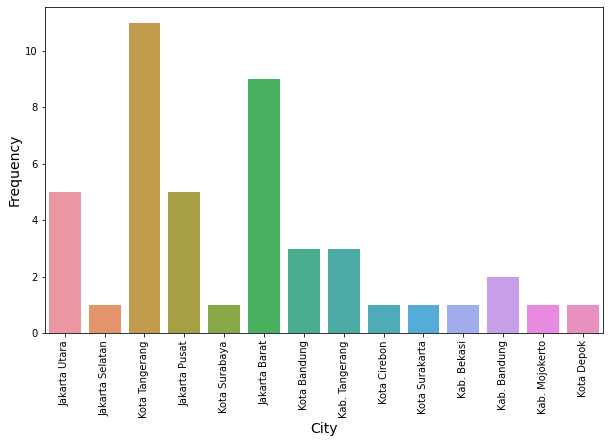

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
city = sns.countplot(df.city, ax=ax)
plt.xticks(rotation=90)
plt.xlabel('City', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

Make a streamlit app

In [3]:
st.title('Make a Simple Stats from Tokopedia Search')
st.markdown("""
* **Python libraries:** base64, pandas, streamlit, numpy, matplotlib, seaborn
* **Data source:** Live Scraping using Selenium.
""")
st.dataframe(df)

2023-04-29 09:47:03.989 
  command:

    streamlit run c:\Users\HP G7\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()